## Plot overview and bifurcation diagram

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import path
import sys, importlib

sys.path.append("../../python_packages")
import ICON_tools

importlib.reload(ICON_tools)

<module 'ICON_tools' from '../../python_packages/ICON_tools.py'>

In [2]:
data_path = "/jetfs/scratch/jhoerner/postprocessing"
Wexplist, Wnexp = ICON_tools.get_explist(data_path, ["ape_ia_7000_56_3W", "ape_ia_8000_90_3W", "ape_ia_8500_90_3W", "ape_ia_9000_90_3W", "ape_ia_10000_41_3W", "ape_ia_15000_17_3W"])
WDSlistgm, _ = ICON_tools.load_ds_2d(data_path, Wexplist, True)


Sexplist, Snexp = ICON_tools.get_explist(data_path, ["ape_ia_5000_13_0S", "ape_ia_5500_90_0S", "ape_ia_6000_90_0S", "ape_ia_6000_90_0S_cltlim_dtime10", "ape_ia_6500_90_0S_cltlim_dtime10", "ape_ia_8000_13_0S", "ape_ia_9000_13_0S", "ape_ia_10000_13_0S" ]) # , "ape_ia_6500_90_0S" , "ape_ia_7000_62_0S"
SDSlistgm, SDSlistzm = ICON_tools.load_ds_2d(data_path, Sexplist, True)

SDSlistgmym = np.empty([Snexp], dtype="object")
SDSlistzmym = np.empty([Snexp], dtype="object")
WDSlistgmym = np.empty([Wnexp], dtype="object")

for i in range(Snexp):
    # fillna
    SDSlistgm[i] = SDSlistgm[i].where(SDSlistgm[i]['sic'] < 1e36)  
    SDSlistgmym[i] = xr.decode_cf(SDSlistgm[i]).groupby('time.year').mean(dim='time')
    SDSlistzm[i] = SDSlistzm[i].where(SDSlistzm[i]['sic'] < 1e36)  
    SDSlistzmym[i] = xr.decode_cf(SDSlistzm[i]).groupby('time.year').mean(dim='time')

for i in range(Wnexp):
    # fillna
    WDSlistgm[i] = WDSlistgm[i].where(WDSlistgm[i]['sic'] < 1e36)
    WDSlistgmym[i] = xr.decode_cf(WDSlistgm[i]).groupby('time.year').mean(dim='time')


colorlist = ["C1","C0","C2","C3","C5","C6","C7"]

ape_ia_7000_56_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_7000_56_3W
ape_ia_8000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8000_90_3W
ape_ia_8500_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_8500_90_3W
ape_ia_9000_90_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_9000_90_3W
ape_ia_10000_41_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_10000_41_3W
ape_ia_15000_17_3W: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_15000_17_3W
ape_ia_5000_13_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5000_13_0S
ape_ia_5500_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_5500_90_0S
ape_ia_6000_90_0S: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S
ape_ia_6000_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postprocessing/ape_ia_6000_90_0S_cltlim_dtime10
ape_ia_6500_90_0S_cltlim_dtime10: directory is /jetfs/scratch/jhoerner/postp

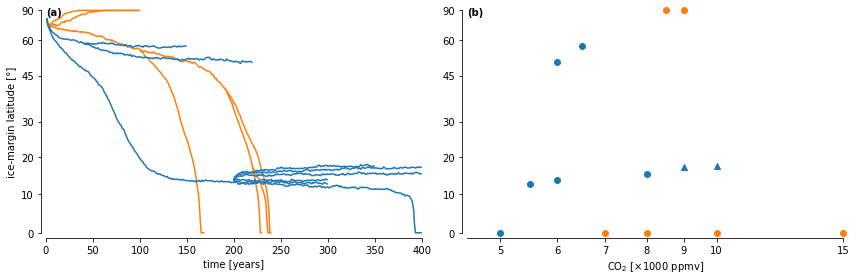

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

# first plot: simoverview
for j in [0,1]:
    if j==0:
        DSlistgm=WDSlistgmym
        explist=Wexplist
        legend_label="Winton"
    elif j==1:
        DSlistgm=SDSlistgmym
        explist=Sexplist
        legend_label="Semtner"
    color=colorlist[j]
    for i, exp in enumerate(explist): # simulations
        ax[0].plot(DSlistgm[i].year,(DSlistgm[i]["sic"].squeeze()), color=color, 
                            label= ICON_tools.find_co2_expname_vscicona(exp) +"ppm",  ls="-", clip_on=False) 

#ax[0].legend(ncol=2)
ax[0].set_xlabel("time [years]")


yticks=[90,60,45,30,20,10,0]
ax[0].set_yticks((ICON_tools.icelatosic(yticks)))
ax[0].set_yticklabels(yticks)
ax[0].invert_yaxis()
ax[0].set_xlim(0,400)
ax[0].set_ylim(1,0)

ax[0].set_ylabel("ice-margin latitude [°]")
ax[0].spines['left'].set_position(('outward',5))
ax[0].spines['bottom'].set_position(('outward',5))


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)



#second plot: bifurcation
color=colorlist[0]
for i, exp in enumerate(Wexplist):
    ax[1].scatter(float(ICON_tools.find_co2_expname_vscicona(exp)),(1-WDSlistgmym[i]["sic"][-1]), color=color, clip_on=False)

color=colorlist[1]
for i, exp in enumerate(Sexplist):
    #ax[1].vlines(float(ICON_tools.find_co2_expname_vscicona(exp))*1.006,(1-SDSlistgmym[i]["sic"][0]),(1-SDSlistgmym[i]["sic"][-1]), color=color, clip_on=False, lw=1)
    if exp=="ape_ia_9000_13_0S" or exp=="ape_ia_10000_13_0S":
        ax[1].scatter(float(ICON_tools.find_co2_expname_vscicona(exp)),(1-SDSlistgmym[i]["sic"][-1]), color=color, clip_on=False, marker="^")
    else:
        ax[1].scatter(float(ICON_tools.find_co2_expname_vscicona(exp)),(1-SDSlistgmym[i]["sic"][-1]), color=color, clip_on=False, marker="o")

    
yticks_deg=[0,10,20,30,45,60,90]
ax[1].set_yticks(1-ICON_tools.icelatosic(yticks_deg))
ax[1].set_ylim(0,1)
ax[1].set_yticklabels(yticks_deg)
ax[1].set_xscale('log')
ax[1].set_xlim(4500,15000)
ax[1].set_xticks([5000,6000,7000,8000,9000,10000,15000])
ax[1].set_xticklabels(["5","6","7","8","9","10","15"])
ax[1].set_xlabel("CO$_2$ [\u00D71000 ppmv]")
#ax[1].set_ylabel("ice-margin latitude [°]")
ax[1].spines['left'].set_position(('outward', 5))
ax[1].spines['bottom'].set_position(('outward', 5))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].annotate("(a)", xycoords="axes fraction", xy=(0.0,0.98), fontweight="bold")
ax[1].annotate("(b)", xycoords="axes fraction", xy=(0.0,0.98), fontweight="bold")


plt.tight_layout()
plt.savefig("plots/Fig1-overview_bifurcation.pdf")